In [158]:
import pandas as pd
import scipy
import pyreadstat
import pyshs
import matplotlib.pyplot as plt
import seaborn as sns
import prince
import numpy as np

In [159]:
pd.set_option('display.max_columns', None)

In [160]:
data = pd.read_excel(r"C:\Users\rana_\OneDrive\Bureau\inserm\travaux\Leem_2020_2021\transfer_6262507_files_792d0717\LEEM - 2021-2020\LEEM_2013_2014_2015\transfer_6497288_files_666cc856\LEEM 2015\LEEM 2015\2015-BDD.xlsx")

In [161]:
data

,QSEXE,QAGE,REGIONL,MKTSIZE,HHSIZE,PCSC8,PCSI8,MARITALL,EDUC8,Q1L,Q2L,Q3L_0,Q3L_1,Q3L_2,Q3L_3,Q3L_4,Q3L_5,Q3L_6,Q3L_7,Q4L_0,Q4L_1,Q4L_2,Q4L_3,Q4L_4,Q4L_5,Q4L_6,Q4L_7,Q4L_8,Q4L_9,Q4L_10,Q4L_11,Q4L_12,Q4L_13,Q4L_14,Q4L_15,Q4L_16,Q5L_0,Q5L_1,Q5L_2,Q5L_3,Q5L_4,Q5L_5,Q5L_6,Q5L_7,Q5L_8,Q5L_9,Q6L_0,Q6L_1,Q6L_2,Q6L_3,Q6L_4,Q6L_5,Q6L_6,Q6L_7,Q6L_8,Q6L_9,Q6L_10,Q7L,Q8L_0,Q8L_1,Q8L_2,Q8L_3,Q8L_4,Q8L_5,Q8L_6,Q9AL_0,Q9AL_1,Q9AL_2,Q9AL_3,Q9AL_4,Q9AL_5,Q9AL_6,Q9AL_7,Q9AL_8,Q9AL_9,Q9AL_10,Q9AL_11,Q9AL_12,Q9BL_0,Q9BL_1,Q9BL_2,Q9BL_3,Q9BL_4,Q9BL_5,Q9BL_6,Q9BL_7,Q9BL_8,Q9BL_9,Q9BL_10,Q9BL_11,Q9BL_12,Q10_0,Q10_1,Q10_2,Q10_3,Q10_4,Q11L_0,Q11L_1,RS1L,RS2,RS3_0,RS3_1,RS3_2,RS3_3,RS3_4,RS3_5,RS3_6,RS3_7,RS3_8,RS3_9,RS4,RS5L,RS5BLL_0,RS5BLL_1,RS5BLL_2,RS5BLL_3,RS5BLL_4,INCOMEL,PSD
0,2,4,5,2,2,8,8,3,3,2,2,1,2,2,2,2,2,2,2,2,2,1,2,3,1,2,2,2,3,3,3,2,3,3,2,2,2,2,2,2,2,4,3,4,3,2,3,3,3,3,2,3,3,3,3,4,4,2,2,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,1,2,2,,,,,,,,,,,,,,2,1,1,2,2,2,2,1,1,0,0,0,0,0,0,0,0,0,1,1,6,,,,,,5,1.017285
1,2,3,3,3,1,5,5,1,6,2,1,1,4,2,4,2,2,2,4,2,2,2,2,3,2,2,2,3,3,3,3,3,3,3,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,3,3,3,3,3,3,,,,,,,,,,,,,,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,3,3,1,2,0,0,0,0,0,0,0,0,0,0,2,6,,,,,,7,0.858532
2,1,3,3,1,3,4,4,3,6,1,1,1,3,1,1,1,3,3,4,1,1,1,2,2,2,4,2,4,4,4,2,4,4,2,4,4,2,2,2,2,2,2,2,2,2,2,3,3,4,3,3,2,3,3,3,4,3,3,4,2,1,3,4,2,2,2,3,1,4,3,2,2,2,3,4,3,4,3,,,,,,,,,,,,,,1,3,3,3,1,2,2,1,1,1,0,0,0,0,0,0,0,0,0,3,2,0,0,1,1,0,9,0.922314
3,2,2,5,4,3,8,8,2,6,3,3,3,3,3,3,3,3,3,2,3,2,3,2,3,3,2,3,3,3,3,3,3,2,2,3,2,5,4,3,3,5,5,3,3,3,3,4,3,4,4,4,4,4,4,4,4,4,4,2,2,3,2,2,2,1,,,,,,,,,,,,,,3,4,1,4,4,3,3,4,3,4,4,4,4,1,3,3,1,3,3,3,5,2,0,0,0,0,0,0,0,0,0,0,2,3,0,2,1,0,0,7,1.075839
4,1,3,1,5,2,5,2,2,3,3,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,3,4,3,3,3,2,2,3,3,3,3,3,3,2,4,2,2,4,2,3,3,3,3,3,2,2,3,2,2,3,2,3,2,3,3,3,3,3,1,3,2,3,3,2,3,3,3,3,2,3,3,,,,,,,,,,,,,,2,3,2,1,3,3,3,6,2,0,0,0,0,0,0,0,0,0,0,2,6,,,,,,7,0.758314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2,3,3,3,1,1,1,1,6,2,2,2,3,2,3,2,2,3,2,2,2,2,2,2,2,3,2,3,3,2,2,2,2,1,2,2,2,3,2,3,2,3,2,2,2,5,3,2,3,3,3,3,2,3,2,3,3,2,3,2,3,3,4,2,2,2,2,2,2,2,2,2,3,2,3,3,3,3,,,,,,,,,,,,,,1,3,1,3,3,3,3,7,2,0,0,0,0,0,0,0,0,0,0,2,6,,,,,,1,1.927351
1006,1,6,1,5,1,7,7,1,7,2,2,2,2,2,2,2,3,2,3,2,2,2,3,3,2,4,2,3,4,3,4,4,3,3,4,4,3,4,2,4,2,2,3,2,2,2,2,2,3,2,3,3,3,3,3,3,3,2,4,2,3,3,3,2,3,2,3,3,3,3,2,2,2,2,2,3,4,2,,,,,,,,,,,,,,2,2,3,2,3,4,4,1,2,0,0,0,0,0,0,0,0,0,0,2,6,,,,,,14,0.975691
1007,2,2,5,4,3,6,8,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,3,3,3,3,3,2,2,3,3,5,5,5,2,3,2,2,3,5,3,3,3,3,3,3,3,3,3,3,3,2,2,1,3,3,3,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,,,,,,,,,,,,,,1,3,3,1,3,2,2,5,2,0,0,0,0,0,0,0,0,0,0,2,2,1,1,0,0,0,7,1.247741
1008,1,3,3,4,2,6,6,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,,,,,,,,,,,,,,1,1,1,1,1,2,2,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,2,1.291698


In [162]:
list_indeps = ['QSEXE', 'QAGE', 'REGIONL', 'MKTSIZE', 'HHSIZE', 'MARITALL', 'PCSI8', 'EDUC8', 'INCOMEL', 'PCSC8'
              , 'Q1L', 'Q3L_6', 'Q3L_7', 'Q4L_0', 'Q4L_1', 'Q4L_2', 'Q4L_3', 'Q4L_4', 'Q4L_5', 'Q4L_6', 'Q4L_7', 'Q4L_8'
              , 'Q4L_9', 'Q4L_10', 'Q4L_11', 'Q4L_12', 'Q4L_13', 'Q4L_14', 'Q4L_15', 'Q4L_16', 'Q8L_6', 'Q9AL_0', 'Q9AL_1'
              , 'Q9AL_2', 'Q9AL_3', 'Q9AL_4', 'Q9AL_5', 'Q9AL_6', 'Q9AL_7', 'Q9AL_8', 'Q9AL_9', 'Q9AL_10', 'Q9AL_11', 'Q9AL_12'
              , 'Q9BL_0', 'Q9BL_1', 'Q9BL_2', 'Q9BL_3', 'Q9BL_4', 'Q9BL_5', 'Q9BL_6', 'Q9BL_7', 'Q9BL_8', 'Q9BL_9', 'Q9BL_10'
              , 'Q9BL_11', 'Q9BL_12', 'RS1L', 'RS2', 'RS3_0', 'RS3_1', 'RS3_2', 'RS3_3', 'RS3_4', 'RS3_5', 'RS3_6', 'RS3_7'
              , 'RS3_8', 'RS3_9']

questions_variables = {'QSEXE' : "Sexe", 'QAGE' : "Groupe d'ages", 'REGIONL' : "Région", 'MKTSIZE' : "Agglomération"
                      , 'HHSIZE' : "Taille du foyer", 'MARITALL' : "Etat matrimonial", 'PCSI8' : "PCS Interviewé", 'EDUC8' : "Diplôme"
                      , 'INCOMEL' : "Revenu annuel net du foyer après impôts", 'PCSC8' : "PCS Chef de famille"
                      , 'Q1L' : "Faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance aux médicaments ?"
                      , 'Q3L_6' : "Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? Les vaccins"
                      , 'Q3L_7' : "Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? L’homéopathie"
                      , 'Q4L_0' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A votre médecin traitant"
                      , 'Q4L_1' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux médecins spécialsites"
                      , 'Q4L_2' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux pharmaciens"
                      , 'Q4L_3' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux infirmières"
                      , 'Q4L_4' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux autorités de santé/Aux pouvoirs publics"
                      , 'Q4L_5' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux chercheurs"
                      , 'Q4L_6' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux associations"
                      , 'Q4L_7' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux notices des médicaments"
                      , 'Q4L_8' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux laboratoires pharmaceutiques"
                      , 'Q4L_9' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux responsables politiques"
                      , 'Q4L_10' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A internet"
                      , 'Q4L_11' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A la presse écrite"
                      , 'Q4L_12' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A la television"
                      , 'Q4L_13' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A la radio"
                      , 'Q4L_14' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A votre entourage"
                      , 'Q4L_15' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux livres publiés sur les medicaments"
                      , 'Q4L_16' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux lanceurs d’alerte de l’opinion publique"
                      , 'Q8L_6' : "Vous avez peur ou pas de rencontrer les risques suivants… Devoir prendre un grand nombre de médicaments et avoir des risques d’interactions"
                      , 'Q9AL_0' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Utiles"
                      , 'Q9AL_1' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Ouvertes au changement"
                      , 'Q9AL_2' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Opaques"
                      , 'Q9AL_3' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Honnêtes"
                      , 'Q9AL_4' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Ethiques"
                      , 'Q9AL_5' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Efficaces"
                      , 'Q9AL_6' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… A la pointe du progrès"
                      , 'Q9AL_7' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Respectueuses de leurs salariés"
                      , 'Q9AL_8' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Crédibles"
                      , 'Q9AL_9' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Très encadrées par les pouvoirs publics"
                      , 'Q9AL_10' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Respectueuses des patients"
                      , 'Q9AL_11' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Transparentes"
                      , 'Q9AL_12' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Respectueuses de l’environnement"
                      , 'Q9BL_0' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Utiles"
                      , 'Q9BL_1' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Ouvertes au changement"
                      , 'Q9BL_2' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Opaques"
                      , 'Q9BL_3' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Honnêtes"
                      , 'Q9BL_4' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Ethiques"
                      , 'Q9BL_5' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Efficaces"
                      , 'Q9BL_6' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… A la pointe du progrès"
                      , 'Q9BL_7' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Respectueuses de leurs salariés"
                      , 'Q9BL_8' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Crédibles"
                      , 'Q9BL_9' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Très encadrées par les pouvoirs publics"
                      , 'Q9BL_10' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Respectueuses des patients"
                      , 'Q9BL_11' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Transparentes"
                      , 'Q9BL_12' : "Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Respectueuses de l’environnement"
                      , 'RS1L' : "A quelle fréquence prenez-vous des médicaments, qu’ils soient avec ou sans ordonnance ?"
                      , 'RS2' : "Vous-même, souffrez-vous d’une ou plusieurs Affection(s) de Longue Durée (ALD), également appelée maladie(s) chronique(s) ou longue(s) maladie(s) ?"
                      , 'RS3_0' : "De quelle(s) maladie(s) longue(s) souffrez-vous ? Rhumatologie (arthrose, polyarthrite rhumatoïde, spondylarthrite grave, ...)"
                      , 'RS3_1' : "De quelle(s) maladie(s) longue(s) souffrez-vous ? Maladie cardiaque (insuffisance cardiaque, trouble du rythme, hypertension artérielle...)"
                      , 'RS3_2' : "De quelle(s) maladie(s) longue(s) souffrez-vous ? Maladie infectieuse (VIH / sida,...)"
                      , 'RS3_3' : "Maladie neurologique (Maladie d’Alzheimer, Maladie de Parkinson, Sclérose en plaques, épilepsie...)"
                      , 'RS3_4' : "De quelle(s) maladie(s) longue(s) souffrez-vous ? Maladie pneumologique (mucoviscidose, insuffisance respiratoire chronique grave, ...)"
                      , 'RS3_5' : "De quelle(s) maladie(s) longue(s) souffrez-vous ? Maladie rénale (insuffisance rénale chronique, néphropathie chronique grave, ...)"
                      , 'RS3_6' : "De quelle(s) maladie(s) longue(s) souffrez-vous ? Maladies du système digestif (maladie de Crohn, cirrhose du foie, hépatite, ...)"
                      , 'RS3_7' : "De quelle(s) maladie(s) longue(s) souffrez-vous ? Dépression"
                      , 'RS3_8' : "De quelle(s) maladie(s) longue(s) souffrez-vous ? Cancer", 'RS3_9' : "De quelle(s) maladie(s) longue(s) souffrez-vous ? Autres"}

In [163]:
# Variable 'QSEXE'
# Question : Sexe
data['QSEXE'].value_counts()

QSEXE
2    529
1    481
Name: count, dtype: int64

In [164]:
data['QSEXE'] = data['QSEXE'].astype('category')
data['QSEXE'] = data['QSEXE'].cat.rename_categories({1 : "Homme"
                                                 , 2 : "Femme"})

In [165]:
data['QSEXE'] = pd.Categorical(data['QSEXE'], 
                            categories=['Femme', 'Homme'], 
                            ordered=True)

In [166]:
# Variable 'QAGE'
# Question : Groupe d'ages
data['QAGE'].value_counts()

QAGE
6    281
3    186
2    166
5    148
4    118
1    111
Name: count, dtype: int64

In [167]:
data['QAGE'] = data['QAGE'].astype('category')
data['QAGE'] = data['QAGE'].cat.rename_categories({1 : "18-24 ans"
                                                 , 2 : "25-34 ans"
                                                 , 3 : "35-44 ans"
                                                 , 4 : "45-54 ans"
                                                 , 5 : "55-59 ans"
                                                 , 6 : "60 ans et plus"})

In [168]:
#changer l'order des categories de la variable 'AGER'
data['QAGE'] = pd.Categorical(data['QAGE'], 
                            categories=['18-24 ans'
                                        , '25-34 ans'
                                        , '35-44 ans'
                                       , '45-54 ans'
                                       , '55-59 ans'
                                       , '60 ans et plus'], 
                            ordered=True)

In [169]:
# Variable 'REGIONL'
# Question : Région
data['REGIONL'].value_counts()

REGIONL
5    244
2    240
3    235
1    181
4    110
Name: count, dtype: int64

In [170]:
data['REGIONL'] = data['REGIONL'].astype('category')
data['REGIONL'] = data['REGIONL'].cat.rename_categories({1 : "Région parisienne"
                                                 , 2 : "Nord-Ouest"
                                                 , 3 : "Nord-Est"
                                                 , 4 : "Sud-Ouest"
                                                 , 5 : "Sud-est"})


In [171]:
# Variable 'MKTSIZE'
# Question : Agglomération
data['MKTSIZE'].value_counts()

MKTSIZE
4    287
1    239
2    175
5    170
3    139
Name: count, dtype: int64

In [172]:
data['MKTSIZE'] = data['MKTSIZE'].astype('category')
data['MKTSIZE'] = data['MKTSIZE'].cat.rename_categories({1 : "Rural"
                                                 , 2 : "2.000 à 19.999 hab."
                                                 , 3 : "20.000 à 99.999 hab."
                                                 , 4 : "100.000 hab. et plus"
                                                 , 5 : "Agglomération de Paris"})

In [173]:
#changer l'order des categories de la variable 'MKTSIZE'
data['MKTSIZE'] = pd.Categorical(data['MKTSIZE'], 
                            categories=['Rural'
                                        , '2.000 à 19.999 hab.'
                                        , '20.000 à 99.999 hab.'
                                       , '100.000 hab. et plus'
                                       , 'Agglomération de Paris'], 
                            ordered=True)

In [174]:
data['MKTSIZE'].value_counts()

MKTSIZE
100.000 hab. et plus      287
Rural                     239
2.000 à 19.999 hab.       175
Agglomération de Paris    170
20.000 à 99.999 hab.      139
Name: count, dtype: int64

In [175]:
# Variable 'HHSIZE'
# Question : Taille du foyer
data['HHSIZE'].value_counts()

HHSIZE
2    618
3    212
1    177
4      3
Name: count, dtype: int64

In [176]:
data['HHSIZE'] = data['HHSIZE'].astype('category')
data['HHSIZE'] = data['HHSIZE'].cat.rename_categories({1 : "1 personne"
                                                 , 2 : "2-3 personnes"
                                                 , 3 : "4-6 personnes"
                                                 , 4 : "Plus de 6 personnes"})

In [177]:
#changer l'order des categories de la variable 'HHSIZE'
data['HHSIZE'] = pd.Categorical(data['HHSIZE'], 
                            categories=['1 personne'
                                        , '2-3 personnes'
                                        , '4-6 personnes'
                                       , 'Plus de 6 personnes'], 
                            ordered=True)

In [178]:
# Variable 'MARITALL'
# Question : Etat matrimonial
data['MARITALL'].value_counts()

MARITALL
3    451
1    277
2    151
7     62
5     39
6     21
4      9
Name: count, dtype: int64

In [179]:
data['MARITALL'] = data['MARITALL'].astype('category')
data['MARITALL'] = data['MARITALL'].cat.rename_categories({1 : "Célibataire"
                                                 , 2 : "En union libre"
                                                 , 3 : "Marié(e)"
                                                 , 4 : "Séparé(e)"
                                                 , 5 : "Divorcé(e)"
                                                 , 6 : "Veuf/ve"
                                                 , 7 : "Pacsé(e) (Pacte civil de solidarité)."})

In [180]:
data['MARITALL'].value_counts()

MARITALL
Marié(e)                                 451
Célibataire                              277
En union libre                           151
Pacsé(e) (Pacte civil de solidarité).     62
Divorcé(e)                                39
Veuf/ve                                   21
Séparé(e)                                  9
Name: count, dtype: int64

In [181]:
# Variable 'EMP' cette variable n'existe pas
# Variable 'PCSI8'
# Question : PCS Interviewé
data['PCSI8'].value_counts()

PCSI8
7    364
5    148
4    142
6    138
3     96
8     77
2     41
1      4
Name: count, dtype: int64

In [182]:
data['PCSI8'] = data['PCSI8'].astype('category')
data['PCSI8'] = data['PCSI8'].cat.rename_categories({1 : "Agriculteur exploitant"
                                                 , 2 : "Profession indépendante"
                                                 , 3 : "Cadre supérieur"
                                                 , 4 : "Profession intermédiaire"
                                                 , 5 : "Employé"
                                                 , 6 : "Ouvrier"
                                                 , 7 : "Retraité"
                                                 , 8 : "Inactif"})

In [183]:
data['PCSI8'].value_counts()

PCSI8
Retraité                    364
Employé                     148
Profession intermédiaire    142
Ouvrier                     138
Cadre supérieur              96
Inactif                      77
Profession indépendante      41
Agriculteur exploitant        4
Name: count, dtype: int64

In [184]:
# Variable 'EDUC8'
# Question : Diplôme
data['EDUC8'].value_counts()

EDUC8
3    287
8    189
4    172
6    166
2     66
7     61
5     36
1     33
Name: count, dtype: int64

In [185]:
data['EDUC8'] = data['EDUC8'].astype('category')
data['EDUC8'] = data['EDUC8'].cat.rename_categories({1 : "École Élémentaire"
                                                 , 2 : "Collège (BREVET)"
                                                 , 3 : "Lycée Professionnel (CAP, BEP, MC, BP, Baccalauréat professionnel)"
                                                 , 4 : "Lycée Général & Technologique (Baccalauréat général / Baccalauréat technologique)"
                                                 , 5 : "Enseignement pré-universitaire / écoles sanitaires et sociales (Diplôme de la capacité en droit, diplôme d'accès aux étu"
                                                 , 6 : "Sections de techniciens supérieurs (BTS) / Institut universitaire de technologie (DUT)"
                                                 , 7 : "Classes préparatoires aux Grandes Ecoles, Grandes Écoles, Écoles Spécialisées (Diplômes professionnels divers : ingénieu"
                                                 , 8 : "Université (DEUG, Licence, Maîtrise, DESS, DEA, Diplôme de docteur)"})

In [186]:
#changer l'order des categories de la variable 'EDUC8'
data['EDUC8'] = pd.Categorical(data['EDUC8'], 
                            categories=["École Élémentaire"
                                        , "Collège (BREVET)"
                                        , "Lycée Professionnel (CAP, BEP, MC, BP, Baccalauréat professionnel)"
                                        , "Lycée Général & Technologique (Baccalauréat général / Baccalauréat technologique)"
                                        , "Enseignement pré-universitaire / écoles sanitaires et sociales (Diplôme de la capacité en droit, diplôme d'accès aux étu"
                                        , "Sections de techniciens supérieurs (BTS) / Institut universitaire de technologie (DUT)"
                                        , "Classes préparatoires aux Grandes Ecoles, Grandes Écoles, Écoles Spécialisées (Diplômes professionnels divers : ingénieu"
                                       , "Université (DEUG, Licence, Maîtrise, DESS, DEA, Diplôme de docteur)"], 
                            ordered=True)                                       

In [187]:
data['EDUC8'].value_counts()

EDUC8
Lycée Professionnel (CAP, BEP, MC, BP, Baccalauréat professionnel)                                                          287
Université (DEUG, Licence, Maîtrise, DESS, DEA, Diplôme de docteur)                                                         189
Lycée Général & Technologique (Baccalauréat général / Baccalauréat technologique)                                           172
Sections de techniciens supérieurs (BTS) / Institut universitaire de technologie (DUT)                                      166
Collège (BREVET)                                                                                                             66
Classes préparatoires aux Grandes Ecoles, Grandes Écoles, Écoles Spécialisées (Diplômes professionnels divers : ingénieu     61
Enseignement pré-universitaire / écoles sanitaires et sociales (Diplôme de la capacité en droit, diplôme d'accès aux étu     36
École Élémentaire                                                                                 

In [188]:
# Variable 'INCOMEL'
# Question : Revenu annuel net du foyer après impôts
data['INCOMEL'].value_counts()

INCOMEL
14    194
10    120
8     118
9     102
7      76
6      72
11     62
1      57
4      54
5      46
3      45
12     39
2      22
13      3
Name: count, dtype: int64

In [189]:
data['INCOMEL'] = data['INCOMEL'].astype('category')
data['INCOMEL'] = data['INCOMEL'].cat.rename_categories({1 : "Entre 0 € et 6000 €"
                                                 , 2 : "De 6001 € à 9000 €"
                                                 , 3 : "De 9001 € à 12000 €"
                                                 , 4 : "De 12001 € à 15000 €"
                                                 , 5 : "De 15001 € à 18000 €"
                                                 , 6 : "De 18001 € à 21000 €"
                                                 , 7 : "De 21001 € à 24000 €"
                                                 , 8 : "De 24001 € à 30000 €"
                                                 , 9 : "De 30001 € à 36000 €"
                                                 , 10 : "De 36001 € à 48000 €"
                                                 , 11 : "De 48001 € à 60000 €"
                                                 , 12 : "De 60001 € à 120000 €"
                                                 , 13 : "120001 € et plus"
                                                 , 14 : "Je préfère ne pas répondre"})
   

In [190]:
data['INCOMEL'].value_counts()

INCOMEL
Je préfère ne pas répondre    194
De 36001 € à 48000 €          120
De 24001 € à 30000 €          118
De 30001 € à 36000 €          102
De 21001 € à 24000 €           76
De 18001 € à 21000 €           72
De 48001 € à 60000 €           62
Entre 0 € et 6000 €            57
De 12001 € à 15000 €           54
De 15001 € à 18000 €           46
De 9001 € à 12000 €            45
De 60001 € à 120000 €          39
De 6001 € à 9000 €             22
120001 € et plus                3
Name: count, dtype: int64

In [191]:
#changer l'order des categories de la variable 'INCOMEL'
data['INCOMEL'] = pd.Categorical(data['INCOMEL'], 
                            categories=['Entre 0 € et 6000 €'
                                        , 'De 6001 € à 9000 €'
                                        , 'De 9001 € à 12000 €'
                                        , 'De 12001 € à 15000 €'
                                        , 'De 15001 € à 18000 €'
                                        , 'De 18001 € à 21000 €'
                                        , 'De 21001 € à 24000 €'
                                        , 'De 24001 € à 30000 €'
                                        , 'De 30001 € à 36000 €'
                                        , 'De 36001 € à 48000 €'
                                        , 'De 48001 € à 60000 €'
                                        , 'De 60001 € à 120000 €'
                                        , '120001 € et plus'
                                        , 'Je préfère ne pas répondre'], 
                            ordered=True)

In [192]:
# Variable 'PCSC8'
# Question : PCS Chef de famille
data['PCSC8'].value_counts()

PCSC8
7    339
4    163
6    153
3    132
5    121
2     48
8     46
1      8
Name: count, dtype: int64

In [193]:
data['PCSC8'] = data['PCSC8'].astype('category')
data['PCSC8'] = data['PCSC8'].cat.rename_categories({1 : "Agriculteur exploitant"
                                                 , 2 : "Profession indépendante"
                                                 , 3 : "Cadre supérieur"
                                                 , 4 : "Profession intermédiaire"
                                                 , 5 : "Employé"
                                                 , 6 : "Ouvrier"
                                                 , 7 : "Retraité"
                                                 , 8 : "Inactif"})

In [194]:
#  les variables'FR01EMPHI' et 'EU01EMP' n'existenet pas
# Variable'Q1L'
# Question : Faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance aux médicaments ?
data['Q1L'].value_counts()

Q1L
2    765
3    137
1     96
4     12
Name: count, dtype: int64

In [195]:
data['Q1L'] = data['Q1L'].astype('category')
data['Q1L'] = data['Q1L'].cat.rename_categories({1: "Tout à fait confiance"
                                                 , 2 : "Plutôt confiance"
                                                 , 3 : "Plutôt pas confiance"
                                                 , 4 : "Pas du tout confiance"})

In [196]:
#changer l'order des categories
data['Q1L'] = pd.Categorical(data['Q1L'], 
                            categories=['Pas du tout confiance'
                                        , 'Plutôt pas confiance'
                                        , 'Plutôt confiance'
                                       , 'Tout à fait confiance'], 
                            ordered=True)

In [197]:
# Variable 'Q3L_6'
# Question : Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? Les vaccins
data['Q3L_6'].value_counts()

Q3L_6
2    548
3    221
1    165
4     76
Name: count, dtype: int64

In [198]:
# Variable 'Q3L_7'
# Question : Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? L’homéopathie
data['Q3L_7'].value_counts()

Q3L_7
2    505
3    224
1    210
4     71
Name: count, dtype: int64

In [199]:
data[['Q3L_6', 'Q3L_7']] = data[['Q3L_6', 'Q3L_7']].astype('category')

In [200]:
ItemsQ3L = ['Q3L_6', 'Q3L_7']

In [201]:
for i in data[ItemsQ3L].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait confiance"
                                                 , 2 : "Plutôt confiance"
                                                 , 3 : "Plutôt pas confiance"
                                                 , 4 : "Pas du tout confiance"})

In [202]:
#changer l'order des categories
for i in data[ItemsQ3L].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout confiance'
                                        , 'Plutôt pas confiance'
                                        , 'Plutôt confiance'
                                       , 'Tout à fait confiance'], 
                            ordered=True)

In [203]:
# Variable 'Q4L_0'
# Question : En matière d’information sur les médicaments,  diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A votre médecin traitant
data['Q4L_0'].value_counts()

Q4L_0
2    507
1    454
3     44
4      5
Name: count, dtype: int64

In [204]:
# Variable 'Q4L_1'
# Question : En matière d’information sur les médicaments,  diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux médecins spécialsites
data['Q4L_1'].value_counts()

Q4L_1
2    597
1    368
3     32
4     13
Name: count, dtype: int64

In [205]:
# Variable 'Q4L_2'
# Question : En matière d’information sur les médicaments,  diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux pharmaciens
data['Q4L_2'].value_counts()

Q4L_2
2    659
1    249
3     87
4     15
Name: count, dtype: int64

In [206]:
# Variable 'Q4L_3'
# Question : En matière d’information sur les médicaments,  diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux infirmières
data['Q4L_3'].value_counts()

Q4L_3
2    716
1    208
3     77
4      9
Name: count, dtype: int64

In [207]:
# Variable 'Q4L_4'
# Question : En matière d’information sur les médicaments,  diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux autorités de santé/Aux pouvoirs publics
data['Q4L_4'].value_counts()

Q4L_4
2    483
3    363
4    106
1     58
Name: count, dtype: int64

In [208]:
# Variable 'Q4L_5'
# Question : En matière d’information sur les médicaments,  diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux chercheurs
data['Q4L_5'].value_counts()

Q4L_5
2    669
1    240
3     89
4     12
Name: count, dtype: int64

In [209]:
# Variable 'Q4L_6'
# Question : En matière d’information sur les médicaments,  diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux associations
data['Q4L_6'].value_counts()

Q4L_6
2    487
3    399
4     82
1     42
Name: count, dtype: int64

In [210]:
# Variable 'Q4L_7'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux notices des médicaments
data['Q4L_7'].value_counts()

Q4L_7
2    697
1    183
3    119
4     11
Name: count, dtype: int64

In [211]:
# Variable 'Q4L_8'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux laboratoires pharmaceutiques
data['Q4L_8'].value_counts()

Q4L_8
2    426
3    391
4    135
1     58
Name: count, dtype: int64

In [212]:
# Variable 'Q4L_9'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux responsables politiques
data['Q4L_9'].value_counts()

Q4L_9
3    455
4    431
2    116
1      8
Name: count, dtype: int64

In [213]:
# Variable 'Q4L_10'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A internet
data['Q4L_10'].value_counts()

Q4L_10
3    523
4    233
2    232
1     22
Name: count, dtype: int64

In [214]:
# Variable 'Q4L_11'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A la presse écrite
data['Q4L_11'].value_counts()

Q4L_11
3    497
2    361
4    134
1     18
Name: count, dtype: int64

In [215]:
# Variable 'Q4L_12'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A la television
data['Q4L_12'].value_counts()

Q4L_12
3    575
2    251
4    171
1     13
Name: count, dtype: int64

In [216]:
# Variable 'Q4L_13'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A la radio
data['Q4L_13'].value_counts()

Q4L_13
3    527
2    314
4    145
1     24
Name: count, dtype: int64

In [217]:
# Variable 'Q4L_14'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A votre entourage
data['Q4L_14'].value_counts()

Q4L_14
2    617
3    257
1     99
4     37
Name: count, dtype: int64

In [218]:
# Variable 'Q4L_15'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux livres publiés sur les medicaments
data['Q4L_15'].value_counts()

Q4L_15
2    462
3    433
4     84
1     31
Name: count, dtype: int64

In [219]:
# Variable 'Q4L_16'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux lanceurs d’alerte de l’opinion publique
data['Q4L_16'].value_counts()

Q4L_16
3    438
2    395
4    119
1     58
Name: count, dtype: int64

In [220]:
data[['Q4L_0', 'Q4L_1', 'Q4L_2', 'Q4L_3', 'Q4L_4', 'Q4L_5', 'Q4L_6', 'Q4L_7', 'Q4L_8', 'Q4L_9', 'Q4L_10', 'Q4L_11', 'Q4L_12', 'Q4L_13', 'Q4L_14', 'Q4L_15', 'Q4L_16']] = data[['Q4L_0', 'Q4L_1', 'Q4L_2', 'Q4L_3', 'Q4L_4', 'Q4L_5', 'Q4L_6', 'Q4L_7', 'Q4L_8', 'Q4L_9', 'Q4L_10', 'Q4L_11', 'Q4L_12', 'Q4L_13', 'Q4L_14', 'Q4L_15', 'Q4L_16']].astype('category')

In [221]:
ItemsQ4L = ['Q4L_0', 'Q4L_1', 'Q4L_2', 'Q4L_3', 'Q4L_4', 'Q4L_5', 'Q4L_6', 'Q4L_7', 'Q4L_8', 'Q4L_9', 'Q4L_10', 'Q4L_11', 'Q4L_12', 'Q4L_13', 'Q4L_14', 'Q4L_15', 'Q4L_16']

In [222]:
for i in data[ItemsQ4L].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait confiance"
                                                 , 2 : "Plutôt confiance"
                                                 , 3 : "Plutôt pas confiance"
                                                 , 4 : "Pas du tout confiance"})

In [223]:
#changer l'order des categories
for i in data[ItemsQ4L].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout confiance'
                                        , 'Plutôt pas confiance'
                                        , 'Plutôt confiance'
                                       , 'Tout à fait confiance'], 
                            ordered=True)

In [224]:
data['Q4L_4'].value_counts()

Q4L_4
Plutôt confiance         483
Plutôt pas confiance     363
Pas du tout confiance    106
Tout à fait confiance     58
Name: count, dtype: int64

In [225]:
# Variable 'Q8L_6'
# Question : Vous avez peur ou pas de rencontrer les risques suivants…Devoir prendre un grand nombre de médicaments et avoir des risques d’interactions  
data['Q8L_6'].value_counts()

Q8L_6
2    458
3    310
1    153
4     89
Name: count, dtype: int64

In [226]:
data['Q8L_6'] = data['Q8L_6'].astype('category')
data['Q8L_6'] = data['Q8L_6'].cat.rename_categories({1: "Très peur"
                                                 , 2 : "Assez peur"
                                                 , 3 : "Assez peu peur"
                                                 , 4 : "Pas peur du tout"})

In [227]:
#changer l'order des categories
data['Q8L_6'] = pd.Categorical(data['Q8L_6'], 
                            categories=['Pas peur du tout'
                                        , 'Assez peu peur'
                                        , 'Assez peur'
                                       , 'Très peur'], 
                            ordered=True)

In [228]:
# Variable 'Q9AL_0'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Utiles
data['Q9AL_0'].value_counts()

Q9AL_0
     501
2    362
1     82
3     60
4      5
Name: count, dtype: int64

In [229]:
# Variable 'Q9AL_1'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Ouvertes au changement
data['Q9AL_1'].value_counts()

Q9AL_1
     501
3    225
2    212
4     52
1     20
Name: count, dtype: int64

In [230]:
# Variable 'Q9AL_2'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Opaques
data['Q9AL_2'].value_counts()

Q9AL_2
     501
2    232
1    139
3    113
4     25
Name: count, dtype: int64

In [231]:
# Variable 'Q9AL_3'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Honnêtes
data['Q9AL_3'].value_counts()

Q9AL_3
     501
3    268
2    136
4    100
1      5
Name: count, dtype: int64

In [232]:
# Variable 'Q9AL_4'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Ethiques
data['Q9AL_4'].value_counts()

Q9AL_4
     501
3    252
2    175
4     74
1      8
Name: count, dtype: int64

In [233]:
# Variable 'Q9AL_5'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Efficaces
data['Q9AL_5'].value_counts()

Q9AL_5
     501
2    375
3    105
1     19
4     10
Name: count, dtype: int64

In [234]:
# Variable 'Q9AL_6'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… A la pointe du progrès
data['Q9AL_6'].value_counts()

Q9AL_6
     501
2    349
3     83
1     63
4     14
Name: count, dtype: int64

In [235]:
# Variable 'Q9AL_7'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Respectueuses de leurs salariés
data['Q9AL_7'].value_counts()

Q9AL_7
     501
2    254
3    207
4     41
1      7
Name: count, dtype: int64

In [236]:
# Variable 'Q9AL_8'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Crédibles
data['Q9AL_8'].value_counts()

Q9AL_8
     501
2    225
3    220
4     52
1     12
Name: count, dtype: int64

In [237]:
# Variable 'Q9AL_9'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Très encadrées par les pouvoirs publics
data['Q9AL_9'].value_counts()

Q9AL_9
     501
3    238
2    183
4     62
1     26
Name: count, dtype: int64

In [238]:
# Variable 'Q9AL_10'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Respectueuses des patients
data['Q9AL_10'].value_counts()

Q9AL_10
     501
3    227
2    220
4     53
1      9
Name: count, dtype: int64

In [239]:
# Variable 'Q9AL_11'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Transparentes
data['Q9AL_11'].value_counts()

Q9AL_11
     501
3    252
4    165
2     83
1      9
Name: count, dtype: int64

In [240]:
# Variable 'Q9AL_12'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des entreprises du médicament: Les entreprises du médicament sont… Respectueuses de l’environnement
data['Q9AL_12'].value_counts()

Q9AL_12
     501
3    273
2    143
4     84
1      9
Name: count, dtype: int64

In [241]:
# Variable 'Q9BL_0'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Utiles
data['Q9BL_0'].value_counts()

Q9BL_0
     509
2    349
1     87
3     51
4     14
Name: count, dtype: int64

In [242]:
# Variable 'Q9BL_1'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Ouvertes au changement
data['Q9BL_1'].value_counts()

Q9BL_1
     509
2    225
3    192
4     61
1     23
Name: count, dtype: int64

In [243]:
# Variable 'Q9BL_2'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Opaques
data['Q9BL_2'].value_counts()

Q9BL_2
     509
2    217
1    155
3     94
4     35
Name: count, dtype: int64

In [244]:
# Variable 'Q9BL_3'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Honnêtes
data['Q9BL_3'].value_counts()

Q9BL_3
     509
3    254
4    116
2    115
1     16
Name: count, dtype: int64

In [245]:
# Variable 'Q9BL_4'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Ethiques
data['Q9BL_4'].value_counts()

Q9BL_4
     509
3    244
2    166
4     77
1     14
Name: count, dtype: int64

In [246]:
# Variable 'Q9BL_5'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Efficaces
data['Q9BL_5'].value_counts()

Q9BL_5
     509
2    347
3    108
1     25
4     21
Name: count, dtype: int64

In [247]:
# Variable 'Q9BL_6'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… A la pointe du progrès
data['Q9BL_6'].value_counts()

Q9BL_6
     509
2    338
3     91
1     56
4     16
Name: count, dtype: int64

In [248]:
# Variable 'Q9BL_7'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Respectueuses de leurs salariés
data['Q9BL_7'].value_counts()

Q9BL_7
     509
2    241
3    201
4     43
1     16
Name: count, dtype: int64

In [249]:
# Variable 'Q9BL_8'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Crédibles
data['Q9BL_8'].value_counts()

Q9BL_8
     509
2    218
3    215
4     56
1     12
Name: count, dtype: int64

In [250]:
# Variable 'Q9BL_9'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Très encadrées par les pouvoirs publics
data['Q9BL_9'].value_counts()

Q9BL_9
     509
3    224
2    172
4     79
1     26
Name: count, dtype: int64

In [251]:
# Variable 'Q9BL_10'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Respectueuses des patients
data['Q9BL_10'].value_counts()

Q9BL_10
     509
3    231
2    182
4     71
1     17
Name: count, dtype: int64

In [252]:
# Variable 'Q9BL_11'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Transparentes
data['Q9BL_11'].value_counts()

Q9BL_11
     509
3    233
4    187
2     70
1     11
Name: count, dtype: int64

In [253]:
# Variable 'Q9BL_12'
# Question : Parmi la liste suivante, veuillez indiquer pour chaque mention si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à l’image que vous avez des laboratoires pharmaceutiques : Les laboratoires pharmaceutiques sont… Respectueuses de l’environnement
data['Q9BL_12'].value_counts()

Q9BL_12
     509
3    269
2    135
4     85
1     12
Name: count, dtype: int64

In [254]:
data[['Q9AL_0', 'Q9AL_1', 'Q9AL_2', 'Q9AL_3', 'Q9AL_4', 'Q9AL_5', 'Q9AL_6', 'Q9AL_7', 'Q9AL_8', 'Q9AL_9', 'Q9AL_10', 'Q9AL_11', 'Q9AL_12', 'Q9BL_0', 'Q9BL_1', 'Q9BL_2', 'Q9BL_3', 'Q9BL_4', 'Q9BL_5', 'Q9BL_6', 'Q9BL_7', 'Q9BL_8', 'Q9BL_9', 'Q9BL_10', 'Q9BL_11', 'Q9BL_12']] = data[['Q9AL_0', 'Q9AL_1', 'Q9AL_2', 'Q9AL_3', 'Q9AL_4', 'Q9AL_5', 'Q9AL_6', 'Q9AL_7', 'Q9AL_8', 'Q9AL_9', 'Q9AL_10', 'Q9AL_11', 'Q9AL_12', 'Q9BL_0', 'Q9BL_1', 'Q9BL_2', 'Q9BL_3', 'Q9BL_4', 'Q9BL_5', 'Q9BL_6', 'Q9BL_7', 'Q9BL_8', 'Q9BL_9', 'Q9BL_10', 'Q9BL_11', 'Q9BL_12']].astype('category')

In [255]:
Items9A_9B = ['Q9AL_0', 'Q9AL_1', 'Q9AL_2', 'Q9AL_3', 'Q9AL_4', 'Q9AL_5', 'Q9AL_6', 'Q9AL_7', 'Q9AL_8', 'Q9AL_9', 'Q9AL_10', 'Q9AL_11', 'Q9AL_12', 'Q9BL_0', 'Q9BL_1', 'Q9BL_2', 'Q9BL_3', 'Q9BL_4', 'Q9BL_5', 'Q9BL_6', 'Q9BL_7', 'Q9BL_8', 'Q9BL_9', 'Q9BL_10', 'Q9BL_11', 'Q9BL_12']

In [256]:
data['Q9BL_12'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, ' '], ordered=False)

In [257]:
for i in data[Items9A_9B].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait"
                                                 , 2 : "Plutôt"
                                                 , 3 : "Plutôt pas"
                                                 , 4 : "Pas du tout"
                                                 , ' ' : " "})

In [258]:
#changer l'order des categories
for i in data[Items9A_9B].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout'
                                        , 'Plutôt pas'
                                        , 'Plutôt'
                                       , 'Tout à fait'
                                       , ' '], 
                            ordered=True)

In [259]:
# Variable 'RS1L'
# Question : A quelle fréquence prenez-vous des médicaments, qu’ils soient avec ou sans ordonnance ?
data['RS1L'].value_counts()

RS1L
1    489
7    169
4     94
6     89
5     56
3     52
2     36
8     25
Name: count, dtype: int64

In [260]:
data['RS1L'] = data['RS1L'].astype('category')
data['RS1L'] = data['RS1L'].cat.rename_categories({1 : "Tous les jours"
                                                 , 2 : "Plusieurs fois par semaine"
                                                 , 3 : "Environ 1 fois par semaine"
                                                 , 4 : "2 à 3 fois par mois"
                                                 , 5 : "1 fois par mois"
                                                 , 6 : "1 fois tous les 2-3 mois"
                                                 , 7 : "Moins souvent"
                                                 , 8 : "Jamais"})

In [261]:
#changer l'order des categories de la variable 'RS1L'
data['RS1L'] = pd.Categorical(data['RS1L'], 
                            categories=['Jamais'
                                        , 'Moins souvent'
                                        , '1 fois tous les 2-3 mois'
                                       , '1 fois par mois'
                                       , '2 à 3 fois par mois'
                                       , 'Environ 1 fois par semaine'
                                       , 'Plusieurs fois par semaine'
                                       , 'Tous les jours'], 
                            ordered=True)

In [262]:
# Variable 'RS2'
# Question : Vous-même, souffrez-vous d’une ou plusieurs Affection(s) de Longue Durée (ALD), également appelée maladie(s) chronique(s) ou longue(s) maladie(s) ? 
data['RS2'].value_counts()

RS2
2    667
1    314
3     29
Name: count, dtype: int64

In [263]:
data['RS2'] = data['RS2'].astype('category')
data['RS2'] = data['RS2'].cat.rename_categories({1 : "Oui"
                                                 , 2 : "Non"
                                                 , 3 : "Ne souhaite pas répondre"})

In [264]:
#changer l'order des categories de la variable 'RS2'
data['RS2'] = pd.Categorical(data['RS2'], 
                            categories=['Non'
                                        , 'Oui'
                                        , 'Ne souhaite pas répondre'], 
                            ordered=True)

In [265]:
# Variable 'RS3_0'
# Question : De quelle(s) maladie(s) longue(s) souffrez-vous ? Rhumatologie (arthrose, polyarthrite rhumatoïde, spondylarthrite grave, ...) 
data['RS3_0'].value_counts()

RS3_0
0    951
1     59
Name: count, dtype: int64

In [266]:
# Variable 'RS3_1'
# Question : De quelle(s) maladie(s) longue(s) souffrez-vous ? Maladie cardiaque (insuffisance cardiaque, trouble du rythme, hypertension artérielle...)
data['RS3_1'].value_counts()

RS3_1
0    882
1    128
Name: count, dtype: int64

In [267]:
# Variable 'RS3_2'
# Question : De quelle(s) maladie(s) longue(s) souffrez-vous ? Maladie infectieuse (VIH / sida,...)
data['RS3_2'].value_counts()

RS3_2
0    1007
1       3
Name: count, dtype: int64

In [268]:
# Variable 'RS3_3'
# Question : De quelle(s) maladie(s) longue(s) souffrez-vous ? Maladie neurologique (Maladie d’Alzheimer, Maladie de Parkinson, Sclérose en plaques, épilepsie...)
data['RS3_3'].value_counts()

RS3_3
0    997
1     13
Name: count, dtype: int64

In [269]:
# Variable 'RS3_4'
# Question : De quelle(s) maladie(s) longue(s) souffrez-vous ? Maladie pneumologique (mucoviscidose, insuffisance respiratoire chronique grave, ...)
data['RS3_4'].value_counts()

RS3_4
0    996
1     14
Name: count, dtype: int64

In [270]:
# Variable 'RS3_5'
# Question : De quelle(s) maladie(s) longue(s) souffrez-vous ? Maladie rénale (insuffisance rénale chronique, néphropathie chronique grave, ...)
data['RS3_5'].value_counts()

RS3_5
0    1006
1       4
Name: count, dtype: int64

In [271]:
# Variable 'RS3_6'
# Question : De quelle(s) maladie(s) longue(s) souffrez-vous ? Maladies du système digestif (maladie de Crohn, cirrhose du foie, hépatite, ...)
data['RS3_6'].value_counts()

RS3_6
0    990
1     20
Name: count, dtype: int64

In [272]:
# Variable 'RS3_7'
# Question : De quelle(s) maladie(s) longue(s) souffrez-vous ? Dépression
data['RS3_7'].value_counts()

RS3_7
0    987
1     23
Name: count, dtype: int64

In [273]:
# Variable 'RS3_8'
# Question : De quelle(s) maladie(s) longue(s) souffrez-vous ? Cancer
data['RS3_8'].value_counts()

RS3_8
0    977
1     33
Name: count, dtype: int64

In [274]:
# Variable 'RS3_9'
# Question : De quelle(s) maladie(s) longue(s) souffrez-vous ? Autres
data['RS3_9'].value_counts()

RS3_9
0    889
1    121
Name: count, dtype: int64

In [275]:
data[['RS3_0', 'RS3_1', 'RS3_2', 'RS3_3', 'RS3_4', 'RS3_5', 'RS3_6', 'RS3_7', 'RS3_8', 'RS3_9']] = data[['RS3_0', 'RS3_1', 'RS3_2', 'RS3_3', 'RS3_4', 'RS3_5', 'RS3_6', 'RS3_7', 'RS3_8', 'RS3_9']].astype('category')

In [276]:
ItemsRS3 = ['RS3_0', 'RS3_1', 'RS3_2', 'RS3_3', 'RS3_4', 'RS3_5', 'RS3_6', 'RS3_7', 'RS3_8', 'RS3_9']

In [277]:
for i in data[ItemsRS3].columns:
    data[i] = data[i].cat.rename_categories({0: "Non"
                                           , 1 : "Oui"})

In [278]:
#changer l'order des categories
for i in data[ItemsRS3].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Non'
                                        , 'Oui'], 
                            ordered=True)

In [279]:
# Les tableaux croisés
B = ['Q1L', 'Q2L', 'Q3L_0', 'Q3L_1', 'Q3L_2', 'Q3L_3', 'Q3L_4', 'Q3L_5', 'Q3L_6', 'Q3L_7'
     , 'Q4L_0', 'Q4L_1', 'Q4L_2', 'Q4L_3', 'Q4L_4', 'Q4L_5', 'Q4L_6', 'Q4L_7', 'Q4L_8', 'Q4L_9'
     , 'Q4L_10', 'Q4L_11', 'Q4L_12', 'Q4L_13', 'Q4L_14', 'Q4L_15', 'Q4L_16', 'Q6L_0', 'Q6L_1', 'Q6L_2'
    , 'Q6L_3', 'Q6L_4', 'Q6L_5', 'Q6L_6', 'Q6L_7', 'Q6L_8', 'Q6L_9', 'Q6L_10', 'Q7L', 'Q8L_6', 'Q9AL_0'
     , 'Q9AL_1', 'Q9AL_2', 'Q9AL_3', 'Q9AL_4', 'Q9AL_5', 'Q9AL_6', 'Q9AL_7', 'Q9AL_8', 'Q9AL_9', 'Q9AL_10'
     , 'Q9AL_11', 'Q9AL_12', 'Q9BL_0', 'Q9BL_1', 'Q9BL_2', 'Q9BL_3', 'Q9BL_4', 'Q9BL_5', 'Q9BL_6', 'Q9BL_7'
     , 'Q9BL_8', 'Q9BL_9', 'Q9BL_10', 'Q9BL_11', 'Q9BL_12', 'RS1L']

In [280]:
# Variable 'Q2L'
# Question : Et faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance aux médicaments que vous prenez ? 
data['Q2L'].value_counts()

Q2L
2    753
1    182
3     66
4      9
Name: count, dtype: int64

In [281]:
data['Q2L'] = data['Q2L'].astype('category')
data['Q2L'] = data['Q2L'].cat.rename_categories({1: "Tout à fait confiance"
                                                 , 2 : "Plutôt confiance"
                                                 , 3 : "Plutôt pas confiance"
                                                 , 4 : "Pas du tout confiance"})

In [282]:
#changer l'order des categories
data['Q2L'] = pd.Categorical(data['Q2L'], 
                            categories=['Pas du tout confiance'
                                        , 'Plutôt pas confiance'
                                        , 'Plutôt confiance'
                                       , 'Tout à fait confiance'], 
                            ordered=True)

In [283]:
# Variable 'Q3L_0'
# Question : Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? Les médicaments sur ordonnance
data['Q3L_0'].value_counts()

Q3L_0
2    666
1    273
3     65
4      6
Name: count, dtype: int64

In [284]:
# Variable 'Q3L_1'
# Question : Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? Les médicaments sans ordonnance
data['Q3L_1'].value_counts()

Q3L_1
2    674
3    237
1     64
4     35
Name: count, dtype: int64

In [285]:
# Variable 'Q3L_2'
# Question : Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? Les médicaments remboursés
data['Q3L_2'].value_counts()

Q3L_2
2    735
1    197
3     72
4      6
Name: count, dtype: int64

In [286]:
# Variable 'Q3L_3'
# Question : Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? Les médicaments non remboursés
data['Q3L_3'].value_counts()

Q3L_3
2    664
3    216
1     98
4     32
Name: count, dtype: int64

In [287]:
# Variable 'Q3L_4'
# Question : Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? Les médicaments de marque
data['Q3L_4'].value_counts()

Q3L_4
2    716
1    191
3     95
4      8
Name: count, dtype: int64

In [288]:
# Variable 'Q3L_5'
# Question : Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? Les médicaments génériques
data['Q3L_5'].value_counts()

Q3L_5
2    546
3    238
1    142
4     84
Name: count, dtype: int64

In [289]:
# Variable 'Q3L_6'
# Question : Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? Les vaccins
data['Q3L_6'].value_counts()

Q3L_6
Plutôt confiance         548
Plutôt pas confiance     221
Tout à fait confiance    165
Pas du tout confiance     76
Name: count, dtype: int64

In [290]:
# Variable 'Q3L_7'
# Question : Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? L’homéopathie
data['Q3L_7'].value_counts()

Q3L_7
Plutôt confiance         505
Plutôt pas confiance     224
Tout à fait confiance    210
Pas du tout confiance     71
Name: count, dtype: int64

In [291]:
data[['Q3L_0', 'Q3L_1', 'Q3L_2', 'Q3L_3', 'Q3L_4', 'Q3L_5']] = data[['Q3L_0', 'Q3L_1', 'Q3L_2', 'Q3L_3', 'Q3L_4', 'Q3L_5']].astype('category')

In [292]:
ItemsQ3L_2 = ['Q3L_0', 'Q3L_1', 'Q3L_2', 'Q3L_3', 'Q3L_4', 'Q3L_5']

In [293]:
for i in data[ItemsQ3L_2].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait confiance"
                                                 , 2 : "Plutôt confiance"
                                                 , 3 : "Plutôt pas confiance"
                                                 , 4 : "Pas du tout confiance"})

In [294]:
#changer l'order des categories
for i in data[ItemsQ3L_2].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout confiance'
                                        , 'Plutôt pas confiance'
                                        , 'Plutôt confiance'
                                       , 'Tout à fait confiance'], 
                            ordered=True)

In [295]:
data['Q3L_1'].value_counts()

Q3L_1
Plutôt confiance         674
Plutôt pas confiance     237
Tout à fait confiance     64
Pas du tout confiance     35
Name: count, dtype: int64

In [296]:
# Variable 'Q6L_0'
# Question : Diriez-vous que vous êtes très bien, plutôt bien, plutôt mal, très mal informé sur les sujets suivants? Sur la qualité des médicaments
data['Q6L_0'].value_counts()

Q6L_0
3    571
2    293
4    117
1     29
Name: count, dtype: int64

In [297]:
# Variable 'Q6L_1'
# Question : Diriez-vous que vous êtes très bien, plutôt bien, plutôt mal, très mal informé sur les sujets suivants? Sur la sécurité des médicaments
data['Q6L_1'].value_counts()

Q6L_1
3    549
2    285
4    157
1     19
Name: count, dtype: int64

In [298]:
# Variable 'Q6L_2'
# Question : Diriez-vous que vous êtes très bien, plutôt bien, plutôt mal, très mal informé sur les sujets suivants? Sur les innovations à venir en matière de médicaments dans les 10 prochaines années
data['Q6L_2'].value_counts()

Q6L_2
3    599
4    238
2    157
1     16
Name: count, dtype: int64

In [299]:
# Variable 'Q6L_3'
# Question : Diriez-vous que vous êtes très bien, plutôt bien, plutôt mal, très mal informé sur les sujets suivants? Sur la fabrication-production des médicaments
data['Q6L_3'].value_counts()

Q6L_3
3    572
4    281
2    140
1     17
Name: count, dtype: int64

In [300]:
# Variable 'Q6L_4'
# Question : Diriez-vous que vous êtes très bien, plutôt bien, plutôt mal, très mal informé sur les sujets suivants? Sur le fonctionnement de la recherche dans le domaine des médicaments
data['Q6L_4'].value_counts()

Q6L_4
3    591
4    214
2    179
1     26
Name: count, dtype: int64

In [301]:
# Variable 'Q6L_5'
# Question : Diriez-vous que vous êtes très bien, plutôt bien, plutôt mal, très mal informé sur les sujets suivants? Sur le rapport entre les bénéfices du médicament  pour les patients et le risque d’effets secondaires (bénéfice-risque)
data['Q6L_5'].value_counts()

Q6L_5
3    552
2    251
4    181
1     26
Name: count, dtype: int64

In [302]:
# Variable 'Q6L_6'
# Question : Diriez-vous que vous êtes très bien, plutôt bien, plutôt mal, très mal informé sur les sujets suivants? Sur les effets secondaires des médicaments
data['Q6L_6'].value_counts()

Q6L_6
3    490
2    349
4    134
1     37
Name: count, dtype: int64

In [303]:
# Variable 'Q6L_7'
# Question : Diriez-vous que vous êtes très bien, plutôt bien, plutôt mal, très mal informé sur les sujets suivants? Sur la procédure d’autorisation de mise sur le marché (AMM) des médicaments
data['Q6L_7'].value_counts()

Q6L_7
3    543
4    266
2    180
1     21
Name: count, dtype: int64

In [304]:
# Variable 'Q6L_8'
# Question : Diriez-vous que vous êtes très bien, plutôt bien, plutôt mal, très mal informé sur les sujets suivants? Sur l’efficacité des médicaments
data['Q6L_8'].value_counts()

Q6L_8
3    512
2    374
4    103
1     21
Name: count, dtype: int64

In [305]:
# Variable 'Q6L_9'
# Question : Diriez-vous que vous êtes très bien, plutôt bien, plutôt mal, très mal informé sur les sujets suivants? Sur la manière dont le prix des medicaments est fixé
data['Q6L_9'].value_counts()

Q6L_9
4    459
3    439
2     99
1     13
Name: count, dtype: int64

In [306]:
# Variable 'Q6L_10'
# Question : Diriez-vous que vous êtes très bien, plutôt bien, plutôt mal, très mal informé sur les sujets suivants? Sur les essais cliniques réalisés avant la mise sur le marché d’un nouveau médicament
data['Q6L_10'].value_counts()

Q6L_10
3    534
4    318
2    140
1     18
Name: count, dtype: int64

In [307]:
data[[ 'Q6L_0', 'Q6L_1', 'Q6L_2', 'Q6L_3', 'Q6L_4', 'Q6L_5', 'Q6L_6', 'Q6L_7', 'Q6L_8', 'Q6L_9', 'Q6L_10']] = data[[ 'Q6L_0', 'Q6L_1', 'Q6L_2', 'Q6L_3', 'Q6L_4', 'Q6L_5', 'Q6L_6', 'Q6L_7', 'Q6L_8', 'Q6L_9', 'Q6L_10']].astype('category')

In [308]:
ItemsQ6L = [ 'Q6L_0', 'Q6L_1', 'Q6L_2', 'Q6L_3', 'Q6L_4', 'Q6L_5', 'Q6L_6', 'Q6L_7', 'Q6L_8', 'Q6L_9', 'Q6L_10']

In [309]:
for i in data[ItemsQ6L].columns:
    data[i] = data[i].cat.rename_categories({1: "Très bien informé"
                                                 , 2 : "Plutôt bien informé"
                                                 , 3 : "Plutôt mal informé"
                                                 , 4 : "Très mal informé"})

In [310]:
#changer l'order des categories
for i in data[ItemsQ6L].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Très mal informé'
                                        , 'Plutôt mal informé'
                                        , 'Plutôt bien informé'
                                       , 'Très bien informé'], 
                            ordered=True)

In [311]:
# Variable 'Q7L'
# Question : Diriez-vous que depuis 20 ans, les médicaments se sont d’une manière générale ?
data['Q7L'].value_counts()

Q7L
2    596
5    151
1    132
3    108
4     23
Name: count, dtype: int64

In [312]:
data['Q7L'] = data['Q7L'].astype('category')
data['Q7L'] = data['Q7L'].cat.rename_categories({1: "Beaucoup améliorés"
                                                 , 2 : "Plutôt améliorés"
                                                 , 3 : "Plutôt détériorés"
                                                 , 4 : "Beaucoup détériorés"
                                                 , 5 : "Ni améliorés, ni détériorés"})

In [313]:
#changer l'order des categories
data['Q7L'] = pd.Categorical(data['Q7L'], 
                            categories=['Beaucoup détériorés'
                                        , 'Plutôt détériorés'
                                        , 'Ni améliorés, ni détériorés'
                                       , 'Plutôt améliorés'
                                       , 'Beaucoup améliorés'], 
                            ordered=True)

In [314]:
# fonction pour creer un tableau croisé multiple avec effectifs et pourcentages
def tableau_croise_final(
    data, var_dep, indeps):
    t_nombre = pyshs.tableau_croise_multiple(data,
                              var_dep,
                              indeps,
                              "PSD",               
                              contenu="absolu") 
    t_pourcentage = pyshs.tableau_croise_multiple(data,
                              var_dep,
                              indeps,
                              "PSD",                   
                              contenu="pourcentage" )
    t=pd.concat({n:pd.concat({"Effectif":t_nombre[n],"%":t_pourcentage[n]},axis=1)                     
        for n in t_nombre.columns if n != "Total" and n != "Distribution"},axis=1)
    
    for n in t_nombre.columns:
        if n == "Total":
            t["Total"] = t_nombre["Total"]

    t["Distribution"]= t_pourcentage["Distribution"]
    
    t = t.reset_index()
    
    t["Question"] = t["Variable"].apply(lambda x : x.split(' ')[0])
    
    t["Question"] = t["Question"].apply(lambda x : list({key: questions_variables[key] for key in [x]}.values())[0])
    
    t = t.set_index(['Question','Variable'])
    
    return t


   

In [315]:
Tableaux = {}
for i in B:
    tableau_i = tableau_croise_final(data, i, list_indeps)
    Tableaux.update({i: tableau_i})

In [323]:
with pd.ExcelWriter(r"C:\Users\rana_\OneDrive\Bureau\inserm\travaux\Leem_2020_2021\transfer_6262507_files_792d0717\LEEM - 2021-2020\LEEM_2013_2014_2015\transfer_6497288_files_666cc856\LEEM 2015\LEEM 2015\Tableaux_croisés_Leem_2015.xlsx") as engine:
    for key, val in Tableaux.items():
        val.to_excel(engine, sheet_name=key)

<ipython-input-323-22fd64ef0641>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  with pd.ExcelWriter(r"C:\Users\rana_\OneDrive\Bureau\inserm\travaux\Leem_2020_2021\transfer_6262507_files_792d0717\LEEM - 2021-2020\LEEM_2013_2014_2015\transfer_6497288_files_666cc856\LEEM 2015\LEEM 2015\Tableaux_croisés_Leem_2015.xlsx") as engine:


In [316]:
# Les ACM
# Variable 'Q5L_0'
# Question : Diriez-vous que vous avez tout à fait, plutôt, plutôt pas ou pas du tout confiance dans les entreprises du secteur : Du pétrole
data['Q5L_0'].value_counts()

Q5L_0
3    404
2    292
4    224
5     72
1     18
Name: count, dtype: int64

In [317]:
# Variable 'Q5L_1'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De la grande distribution
data['Q5L_1'].value_counts()

Q5L_1
3    410
2    395
4    152
5     33
1     20
Name: count, dtype: int64

In [322]:
# Variable 'Q5L_2'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Des télécommunications
data['Q5L_2'].value_counts()

Q5L_2
2    480
3    346
4    103
1     41
5     40
Name: count, dtype: int64

In [323]:
# Variable 'Q5L_3'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De l'agro-alimentaire
data['Q5L_3'].value_counts()

Q5L_3
3    399
2    396
4    155
5     39
1     21
Name: count, dtype: int64

In [324]:
# Variable 'Q5L_4'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Du médicament
data['Q5L_4'].value_counts()

Q5L_4
2    561
3    269
4     99
1     53
5     28
Name: count, dtype: int64

In [325]:
# Variable 'Q5L_5'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De la banque et de l'assurance
data['Q5L_5'].value_counts()

Q5L_5
3    444
2    296
4    226
5     30
1     14
Name: count, dtype: int64

In [326]:
# Variable 'Q5L_6'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Du bâtiment
data['Q5L_6'].value_counts()

Q5L_6
2    582
3    282
4     57
5     48
1     41
Name: count, dtype: int64

In [327]:
# Variable 'Q5L_7'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De l'automobile
data['Q5L_7'].value_counts()

Q5L_7
2    641
3    223
4     54
1     53
5     39
Name: count, dtype: int64

In [328]:
# Variable 'Q5L_8'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Du nucléaire
data['Q5L_8'].value_counts()

Q5L_8
2    341
3    330
4    212
5     74
1     53
Name: count, dtype: int64

In [329]:
# Variable 'Q5L_9'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De l'aéronautique
data['Q5L_9'].value_counts()

Q5L_9
2    652
3    130
1    115
5     70
4     43
Name: count, dtype: int64

In [330]:
data[['Q5L_0', 'Q5L_1', 'Q5L_2', 'Q5L_3', 'Q5L_4', 'Q5L_5', 'Q5L_6', 'Q5L_7', 'Q5L_8', 'Q5L_9']] = data[['Q5L_0', 'Q5L_1', 'Q5L_2', 'Q5L_3', 'Q5L_4', 'Q5L_5', 'Q5L_6', 'Q5L_7', 'Q5L_8', 'Q5L_9']].astype('category')

In [331]:
Entrep_conf = ['Q5L_0', 'Q5L_1', 'Q5L_2', 'Q5L_3', 'Q5L_4', 'Q5L_5', 'Q5L_6', 'Q5L_7', 'Q5L_8', 'Q5L_9']

In [332]:
for i in data[Entrep_conf].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait"
                                                 , 2 : "Plutôt"
                                                 , 3 : "Plutôt pas"
                                                 , 4 : "Pas du tout"
                                                 , 5 : "Vous ne savez pas"})

In [333]:
#changer l'order des categories
for i in data[Entrep_conf].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout'
                                        , 'Plutôt pas'
                                        , 'Plutôt'
                                       , 'Tout à fait'
                                       , 'Vous ne savez pas'], 
                            ordered=True)

In [334]:
# Changer les noms des variables Q5L
dict_nom = {'Q5L_0': "Pétrole"
        , 'Q5L_1': "Grande distribution"
        , 'Q5L_2': "Télécommunications"
        , 'Q5L_3' : "Agro-alimentaire"
        , 'Q5L_4' : "Médicament"
        , 'Q5L_5' : "Banque et Assurance"
        , 'Q5L_6' : "Bâtiment"
        , 'Q5L_7' : "Automobile"
        , 'Q5L_8' : "Nucléaire"
        , 'Q5L_9' : "Aéronautique"}
data.rename(columns=dict_nom,
          inplace=True)

In [335]:
data

,QSEXE,QAGE,REGIONL,MKTSIZE,HHSIZE,PCSC8,PCSI8,MARITALL,EDUC8,Q1L,Q2L,Q3L_0,Q3L_1,Q3L_2,Q3L_3,Q3L_4,Q3L_5,Q3L_6,Q3L_7,Q4L_0,Q4L_1,Q4L_2,Q4L_3,Q4L_4,Q4L_5,Q4L_6,Q4L_7,Q4L_8,Q4L_9,Q4L_10,Q4L_11,Q4L_12,Q4L_13,Q4L_14,Q4L_15,Q4L_16,Pétrole,Grande distribution,Télécommunications,Agro-alimentaire,Médicament,Banque et Assurance,Bâtiment,Automobile,Nucléaire,Aéronautique,Q6L_0,Q6L_1,Q6L_2,Q6L_3,Q6L_4,Q6L_5,Q6L_6,Q6L_7,Q6L_8,Q6L_9,Q6L_10,Q7L,Q8L_0,Q8L_1,Q8L_2,Q8L_3,Q8L_4,Q8L_5,Q8L_6,Q9AL_0,Q9AL_1,Q9AL_2,Q9AL_3,Q9AL_4,Q9AL_5,Q9AL_6,Q9AL_7,Q9AL_8,Q9AL_9,Q9AL_10,Q9AL_11,Q9AL_12,Q9BL_0,Q9BL_1,Q9BL_2,Q9BL_3,Q9BL_4,Q9BL_5,Q9BL_6,Q9BL_7,Q9BL_8,Q9BL_9,Q9BL_10,Q9BL_11,Q9BL_12,Q10_0,Q10_1,Q10_2,Q10_3,Q10_4,Q11L_0,Q11L_1,RS1L,RS2,RS3_0,RS3_1,RS3_2,RS3_3,RS3_4,RS3_5,RS3_6,RS3_7,RS3_8,RS3_9,RS4,RS5L,RS5BLL_0,RS5BLL_1,RS5BLL_2,RS5BLL_3,RS5BLL_4,INCOMEL,PSD
0,Femme,45-54 ans,Sud-est,2.000 à 19.999 hab.,2-3 personnes,Inactif,Inactif,Marié(e),"Lycée Professionnel (CAP, BEP, MC, BP, Baccala...",Plutôt confiance,Plutôt confiance,Tout à fait confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Tout à fait confiance,Plutôt confiance,Plutôt pas confiance,Tout à fait confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt confiance,Plutôt confiance,Plutôt,Plutôt,Plutôt,Plutôt,Plutôt,Pas du tout,Plutôt pas,Pas du tout,Plutôt pas,Plutôt,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt bien informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Très mal informé,Très mal informé,Plutôt améliorés,2,1,2,1,2,2,Assez peur,Plutôt,Plutôt,Plutôt,Plutôt,Tout à fait,Plutôt,Plutôt,Plutôt,Plutôt,Plutôt,Tout à fait,Plutôt,Plutôt,,,,,,,,,,,,,,2,1,1,2,2,2,2,Tous les jours,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,1,6,,,,,,De 15001 € à 18000 €,1.017285
1,Femme,35-44 ans,Nord-Est,20.000 à 99.999 hab.,1 personne,Employé,Employé,Célibataire,Sections de techniciens supérieurs (BTS) / Ins...,Plutôt confiance,Tout à fait confiance,Tout à fait confiance,Pas du tout confiance,Plutôt confiance,Pas du tout confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Pas du tout confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt pas confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt confiance,Plutôt confiance,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,"Ni améliorés, ni détériorés",3,3,3,3,3,3,Assez peu peur,,,,,,,,,,,,,,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt pas,2,2,2,2,2,3,3,Tous les jours,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,2,6,,,,,,De 21001 € à 24000 €,0.858532
2,Homme,35-44 ans,Nord-Est,Rural,4-6 personnes,Profession intermédiaire,Profession intermédiaire,Marié(e),Sections de techniciens supérieurs (BTS) / Ins...,Tout à fait confiance,Tout à fait confiance,Tout à fait confiance,Plutôt pas confiance,Tout à fait confiance,Tout à fait confiance,Tout à fait confiance,Plutôt pas confiance,Plutôt pas confiance,Pas du tout confiance,Tout à fait confiance,Tout à fait confiance,Tout à fait confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Pas du tout confiance,Plutôt confiance,Pas du tout confiance,Pas du tout confiance,Pas du tout confiance,Plutôt confiance,Pas du tout confiance,Pas du tout confiance,Plutôt 

In [336]:
ItemsQ5L = ['Pétrole', 'Grande distribution', 'Télécommunications', 'Agro-alimentaire', 'Médicament', 'Banque et Assurance', 'Bâtiment', 'Automobile', 'Nucléaire', 'Aéronautique']

In [338]:
# Application de l'ACM
acm_ItemsQ5L = prince.MCA(n_components = 2)

acm_ItemsQ5L = acm_ItemsQ5L.fit(data[ItemsQ5L])

ax = acm_ItemsQ5L.plot(X=data[ItemsQ5L])
ax

alt.Chart(...)

In [339]:
acm_vQ5L =acm_ItemsQ5L.column_coordinates(data[ItemsQ5L])
acm_vQ5L

,0,1
Pétrole_Pas du tout,0.356774,1.138324
Pétrole_Plutôt pas,-0.221162,0.076463
Pétrole_Plutôt,-0.487681,-0.609513
Pétrole_Tout à fait,-1.044325,-1.879235
Pétrole_Vous ne savez pas,2.369903,-1.028775
Grande distribution_Pas du tout,0.446561,1.322531
Grande distribution_Plutôt pas,-0.158673,0.180299
Grande distribution_Plutôt,-0.273054,-0.469323
Grande distribution_Tout à fait,-0.969594,-1.764504
Grande distribution_Vous ne savez pas,3.770505,-1.644683


In [340]:
acm_vQ5L.rename(columns = {0:'Compoenent 0(13.61%)', 1 : 'Componenet 1(12.10%)'}, inplace = True)
acm_vQ5L
acm_vQ5L = acm_vQ5L.reset_index()
acm_vQ5L.columns = ['Variable', 'Compoenent 0(13.61%)' , 'Componenet 1(12.10%)']
acm_vQ5L


,Variable,Compoenent 0(13.61%),Componenet 1(12.10%)
0,Pétrole_Pas du tout,0.356774,1.138324
1,Pétrole_Plutôt pas,-0.221162,0.076463
2,Pétrole_Plutôt,-0.487681,-0.609513
3,Pétrole_Tout à fait,-1.044325,-1.879235
4,Pétrole_Vous ne savez pas,2.369903,-1.028775
5,Grande distribution_Pas du tout,0.446561,1.322531
6,Grande distribution_Plutôt pas,-0.158673,0.180299
7,Grande distribution_Plutôt,-0.273054,-0.469323
8,Grande distribution_Tout à fait,-0.969594,-1.764504
9,Grande distribution_Vous ne savez pas,3.770505,-1.644683


Text(0.5, 1.0, 'ACM de confiance dans les entreprises')

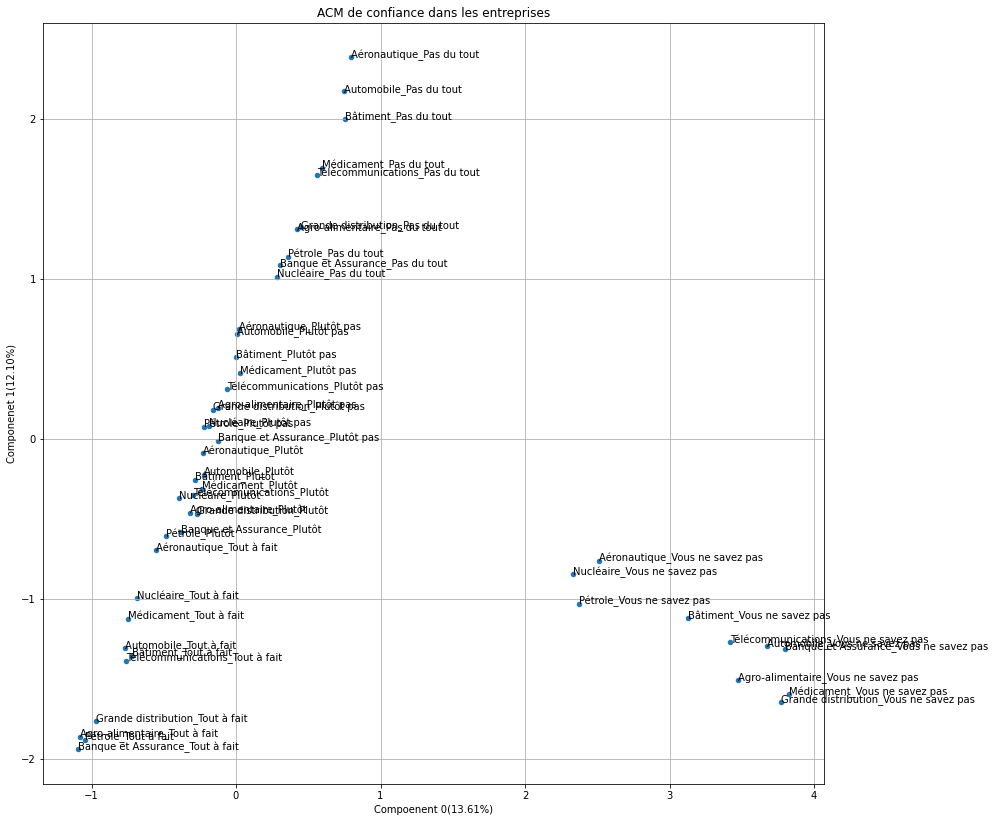

In [341]:
#ACM Items Q5L

#create scatter plot 
plt.rcParams['figure.figsize'] = [14, 14]
x= acm_vQ5L['Compoenent 0(13.61%)']
y= acm_vQ5L['Componenet 1(12.10%)']
ax = acm_vQ5L.plot(kind='scatter', x='Compoenent 0(13.61%)', y='Componenet 1(12.10%)')
plt.grid()

#label each point in scatter plot
annotations = acm_vQ5L['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM de confiance dans les entreprises")    